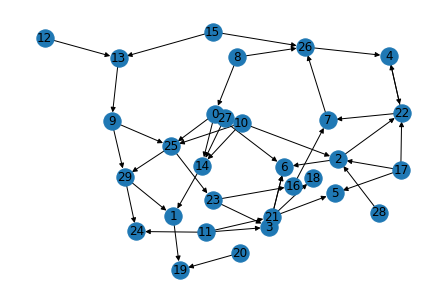

In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import numpy as np

g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))
nx.draw_networkx_labels(g, pos =nx.kamada_kawai_layout(g))
plt.show()

In [78]:
def calculate_page_rank(g, alpha=0.85, N=1000):
    page_rank_dict = {}
    for node in g.nodes:
        page_rank_dict[node] = 0
    surfer = rd.choice(list(g.nodes))
    for i in range(N):
#         print(surfer)
        page_rank_dict[surfer] +=1/N
        if rd.random() < alpha:
            if list(g.neighbors(surfer)):
                surfer = rd.choice(list(g.neighbors(surfer)))
            else:
                surfer = rd.choice(list(g.nodes))
        else:
            surfer = rd.choice(list(g.nodes))
    return page_rank_dict

In [88]:
analytical = np.array(list(nx.pagerank(g).values()))
abs(analytical-simulated)

array([3.09148508e-04, 3.96149051e-04, 1.78442239e-04, 2.36426445e-04,
       1.57909999e-03, 1.28038557e-04, 1.61990766e-04, 4.10379930e-04,
       6.36594051e-04, 2.47764266e-05, 6.26594051e-04, 9.34059486e-05,
       3.65940514e-05, 4.74257420e-04, 4.95500084e-04, 3.76594051e-04,
       6.65203918e-04, 3.36594051e-04, 1.59668919e-04, 1.05395546e-05,
       3.93405949e-04, 4.35036311e-04, 2.05554135e-03, 1.66228045e-04,
       6.93313022e-05, 6.68692466e-05, 1.73831552e-04, 7.34059486e-05,
       3.46594051e-04, 1.59749971e-04])

In [121]:
avg_abs_diff = []
avg_abs_diff_scatter = []
sims = 20
Nspace = np.linspace(10,5000,50)
Nspace_scatter = np.array([[x]*sims for x in Nspace])
analytical = np.array(list(nx.pagerank(g).values()))
for n in Nspace:
    avgs = []
    for _ in range(sims):
        simulated = np.array(list(calculate_page_rank(g,N=int(n)).values()))
        avgs.append(np.mean(abs(analytical-simulated)))
    if n==0:
        print(np.mean(simulated-analytical))
    avg_abs_diff_scatter.append(avgs)
    avg_abs_diff.append(np.mean(avgs))

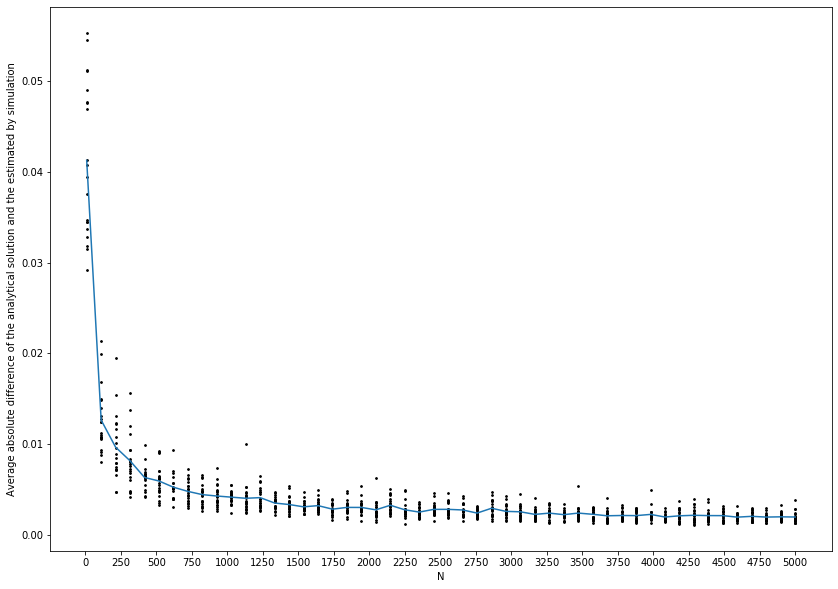

In [128]:
plt.figure(figsize=(14,10))
plt.plot(Nspace,avg_abs_diff)
plt.scatter(Nspace_scatter.reshape(-1),np.array(avg_abs_diff_scatter).reshape(-1),s=3,color = 'black')
plt.xlabel('N')
plt.ylabel('Average absolute difference of the analytical solution and the estimated by simulation')
plt.xticks(np.linspace(0,5000,21))

plt.show()

We can see how when he have fewer than N simulations the difference in the analytical solution and the simulation is still large, and at around 500 it starts looking much more similar. From 500 onwards the result is pretty close to 0 (which is what we would get if the simulations and the analytical solutions gave the exact same value). Furthermore, the variance at smaller N's is much greater since the confidence intervals seem like they would be much larger, and the greater N gets, the narrower this confidence intervals are.